In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


<class 'ModuleNotFoundError'>: No module named 'seaborn'

In [2]:
df=pd.read_csv('pl-tables-1993-2024.csv')
df

,season_end_year,team,position,played,won,drawn,lost,gf,ga,gd,points,notes
0,1993,Manchester Utd,1,42,24,12,6,67,31,36,84,→ Champions League via league finish
1,1993,Aston Villa,2,42,21,11,10,57,40,17,74,→ UEFA Cup via league finish
2,1993,Norwich City,3,42,21,9,12,61,65,-4,72,→ UEFA Cup via league finish 1
3,1993,Blackburn,4,42,20,11,11,68,46,22,71,NaN
4,1993,QPR,5,42,17,12,13,63,55,8,63,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
641,2024,Brentford,16,38,10,9,19,56,65,-9,39,NaN
642,2024,Nottingham Forest,17,38,9,9,20,49,67,-18,32,4-point deduction
643,2024,Luton Town,18,38,6,8,24,52,85,-33,26,Relegated
644,2024,Burnley,19,38,5,9,24,41,78,-37,24,Relegated


In [3]:
df=df.drop(columns=['position','gf','ga','gd','notes'])

In [4]:
print(df.columns)

Index(['season_end_year', 'team', 'played', 'won', 'drawn', 'lost', 'points'], dtype='object')


In [5]:
df.isnull().sum()

season_end_year    0
team               0
played             0
won                0
drawn              0
lost               0
points             0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [3]:
import pandas as pd
df = pd.read_csv("pl-tables-1993-2024.csv")
df = df[['season_end_year','team','played','won','drawn','lost','points']]
df.to_csv("cleaned_dataset.csv",index=False)

In [4]:
import pandas as pd
file_path="cleaned_dataset.csv"
df=pd.read_csv(file_path)
categorical_cols=df.select_dtypes(include=['object']).columns
print("Categorical Columns",categorical_cols.tolist())

Categorical Columns ['team']


In [5]:
from sklearn.preprocessing import LabelEncoder
df_label=df.copy()
le=LabelEncoder()
for col in categorical_cols:
    df_label[col]=le.fit_transform(df_label[col])
print("label encoded dataset(5 rows):")
print(df_label.head())

label encoded dataset(5 rows):
   season_end_year  team  played  won  drawn  lost  points
0             1993    28      42   24     12     6      84
1             1993     1      42   21     11    10      74
2             1993    31      42   21      9    12      72
3             1993     4      42   20     11    11      71
4             1993    35      42   17     12    13      63


In [6]:
df_label.to_csv("overallpts label encoded.csv",index=False)

In [2]:
import pandas as pd
df=pd.read_csv("cleaned_dataset.csv")
df_onehot_encoded=pd.get_dummies(df,columns=['team'],dtype=int)
print("One hot encoded dataset(5 rows):")
print(df_onehot_encoded.head())
df_onehot_encoded.to_csv("overallpts onehot encoding.csv",index=False)

One hot encoded dataset(5 rows):
   season_end_year  played  won  drawn  lost  points  team_Arsenal  \
0             1993      42   24     12     6      84             0   
1             1993      42   21     11    10      74             0   
2             1993      42   21      9    12      72             0   
3             1993      42   20     11    11      71             0   
4             1993      42   17     12    13      63             0   

   team_Aston Villa  team_Barnsley  team_Birmingham City  ...  \
0                 0              0                     0  ...   
1                 1              0                     0  ...   
2                 0              0                     0  ...   
3                 0              0                     0  ...   
4                 0              0                     0  ...   

   team_Sunderland  team_Swansea City  team_Swindon Town  team_Tottenham  \
0                0                  0                  0               0   
1  

In [4]:
import pandas as pd
df = pd.read_csv("cleaned_dataset.csv")
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
def remove_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df
df_no_outliers = remove_outliers(df, num_cols)
print("Original shape:", df.shape)
print("After removing outliers:", df_no_outliers.shape)

Original shape: (646, 7)
After removing outliers: (576, 7)


Matplotlib is building the font cache; this may take a moment.


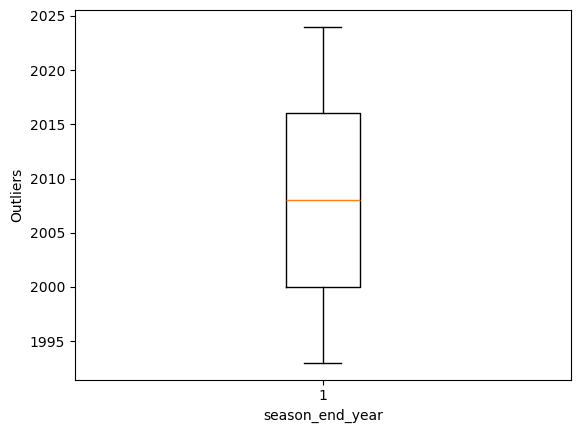

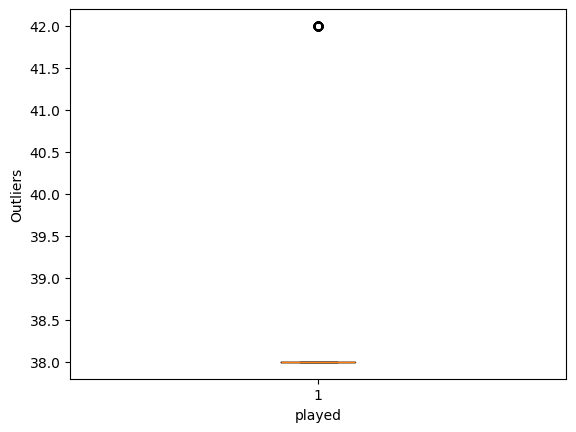

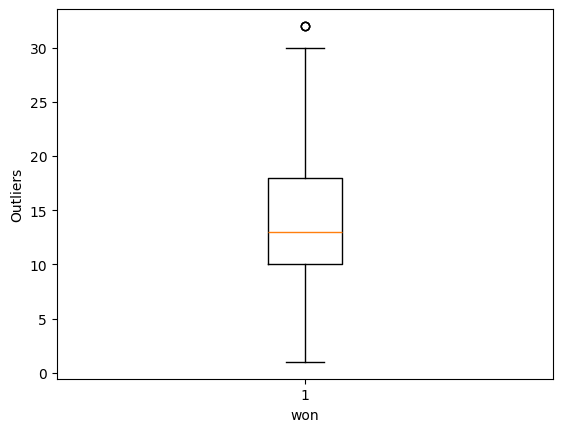

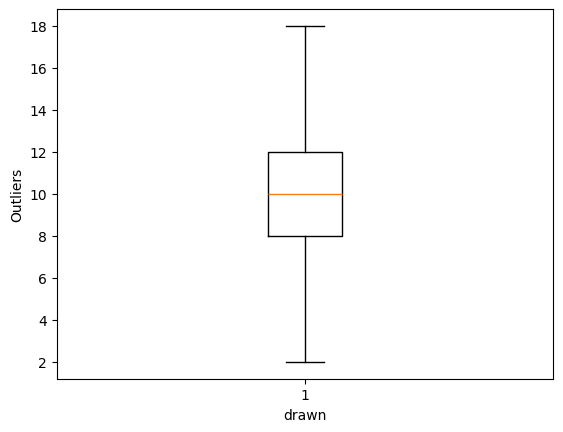

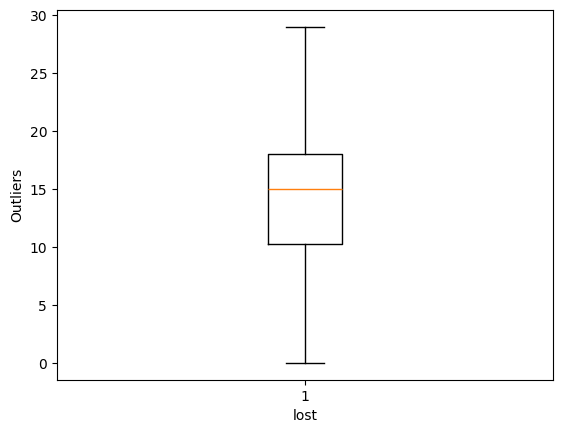

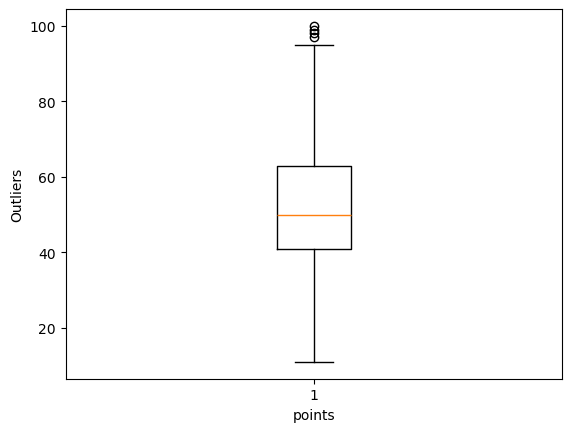

In [5]:
import matplotlib.pyplot as plt
import numpy as np
for itr in df.columns:
    if df[itr].dtype == np.int64:   # check if column is integer type
        plt.boxplot(df[itr].values)
        plt.xlabel(itr)
        plt.ylabel('Outliers')
        plt.show()

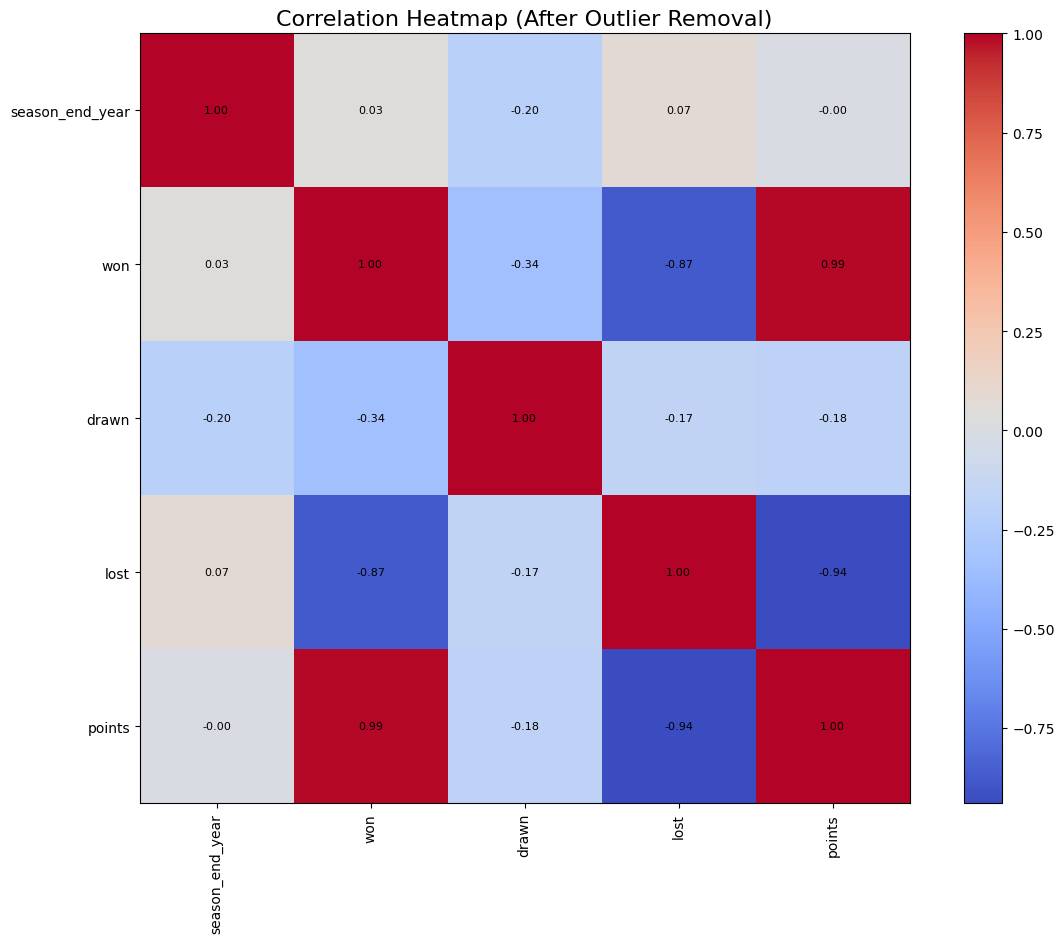

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# 1. only selecting numeric columns that are existed
num_cols = df_no_outliers.select_dtypes(include=[np.number]).columns.tolist()

# 2. Remove constant columns
cleaned = df_no_outliers[num_cols].loc[:, df_no_outliers[num_cols].apply(pd.Series.nunique) > 1]

# 3. Replace NaN values with 0
cleaned = cleaned.fillna(0)

# 4. Compute correlation
corr = cleaned.corr()

# 5. Plot heatmap
plt.figure(figsize=(14,10))
plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
plt.colorbar()

plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)

for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        plt.text(j, i, f"{corr.iloc[i, j]:.2f}",
                 ha="center", va="center", color="black", fontsize=8)

plt.title("Correlation Heatmap (After Outlier Removal)", fontsize=16)
plt.show()

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['points'] = le.fit_transform(df['points'])

In [8]:
x = df.drop(columns='points')
y = df['points']

In [ ]:
x

In [11]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load dataset
df = pd.read_csv("cleaned_dataset.csv")

# Define features and target
# Define features and target correctly
X = df.drop(columns=['points'])
y = df['points']


# Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(exclude=['object']).columns

# Preprocessing: One-hot encode categorical + keep numeric
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ]
)

# Build pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# Optional: Residual plot
#plt.figure(figsize=(6,4))
#sns.scatterplot(x=y_test, y=y_pred)
#plt.xlabel("Actual Points")
#plt.ylabel("Predicted Points")
#plt.title("Actual vs Predicted Points")
#plt.show()


Model Performance Metrics:
Mean Squared Error (MSE): 0.1211
Root Mean Squared Error (RMSE): 0.3480
Mean Absolute Error (MAE): 0.0848
R² Score: 0.9995


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load dataset
df = pd.read_csv("cleaned_dataset.csv")

# Drop leakage columns
X = df[['season_end_year', 'team']]   # only safe predictors
y = df['points']                      # target variable

# Preprocessing: One-hot encode team
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), ['team']),
        ('num', 'passthrough', ['season_end_year'])
    ]
)

# Build pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")



Model Performance Metrics:
Mean Squared Error (MSE): 158.8595
Root Mean Squared Error (RMSE): 12.6039
Mean Absolute Error (MAE): 10.1182
R² Score: 0.3952
